Getting **CUDA** Version



In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


Installing and Importing Required packages

In [3]:
!pip install easyocr

!pip install imutils

!pip install opencv-python-headless==4.1.2.30

!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 732 kB/s 
     |████████████████████████████████| 47.6 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


In [4]:
 import cv2
 from matplotlib import pyplot as plt
 import numpy as np
 import imutils
 import easyocr 

Convert Image to gray scale format

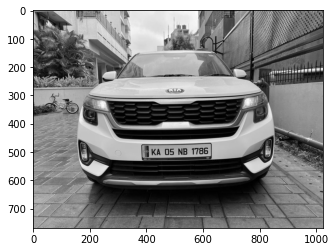

In [8]:
img = cv2.imread('/car1.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

Apply Filter and Edge Detection

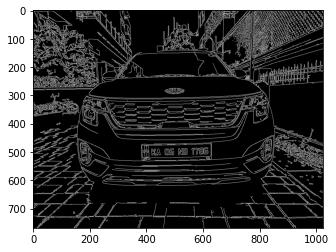

In [9]:
bfilter = cv2.bilateralFilter(gray , 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge Detection
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))

Find Contours and Apply Mask

In [10]:
keypoints = cv2.findContours(edged.copy() , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE )
contours = imutils.grab_contours(keypoints)
contours = sorted(contours , key = cv2.contourArea ,reverse = True)[:10]

In [11]:
location = None  
for contour in contours:
  approx = cv2.approxPolyDP(contour , 10, True)
  if len(approx) == 4:   #if a rectangle store it in location
    location = approx
    break

In [12]:
location

array([[[628, 472]],

       [[389, 475]],

       [[386, 518]],

       [[626, 515]]], dtype=int32)

In [13]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask , [location] , 0, 200, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

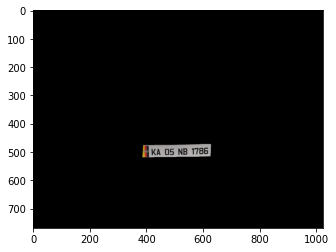

In [14]:
plt.imshow(cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB))

Cropping Out the Number Plate

In [19]:
(x,y) = np.where(mask == 200)
(x1,y1) = (np.min(x) , np.min(y))
(x2,y2) = (np.max(x) , np.max(y))
cropped_image = gray[x1:x2+1 , y1:y2+1]


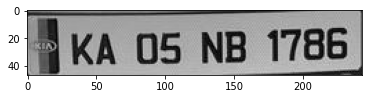

In [20]:
plt.imshow(cv2.cvtColor(cropped_image , cv2.COLOR_RGB2BGR))

Using easy OCR to Read Text

In [43]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `we

[([[29, 7], [239, 7], [239, 45], [29, 45]],
  'KA 05 NB 1786',
  0.9925503397846722)]

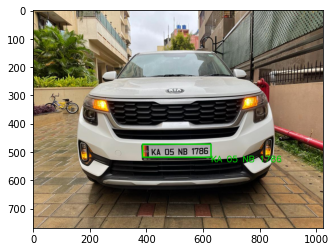

In [47]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,200,0), thickness =2,lineType=2)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,200,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))